In [3]:
import geopandas
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
def load_in_data(shp_file, csv_file):
    shp_dt = geopandas.read_file(shp_file)
    csv_dt = pd.read_csv(csv_file)
    return shp_dt.merge(csv_dt, left_on = 'CTIDFP00', right_on = 'CensusTract', how ='left')

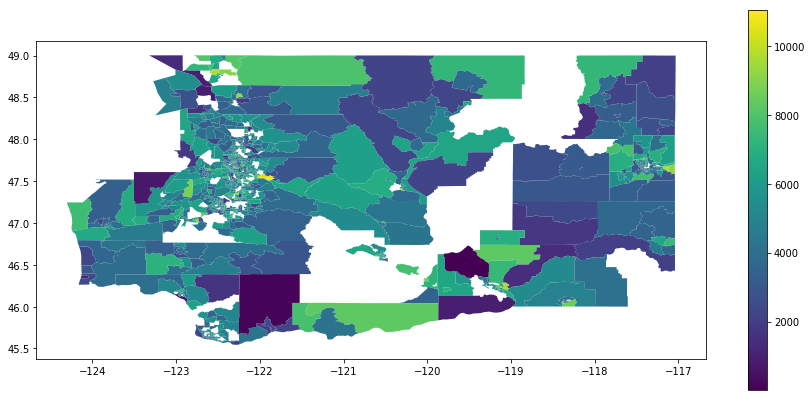

In [139]:
wa = load_in_data('tl_2010_53_tract00/tl_2010_53_tract00.shp', 'food_access.csv')
wa.dropna().plot(column='POP2010', figsize=(15, 7), legend = True)

In [6]:
load_in_data('tl_2010_53_tract00/tl_2010_53_tract00.shp', 'food_access.csv')

,STATEFP00,COUNTYFP00,TRACTCE00,CTIDFP00,NAME00,NAMELSAD00,MTFCC00,FUNCSTAT00,ALAND00,AWATER00,...,GroupQuartersFlag,OHU2010,NUMGQTRS,PCTGQTRS,LowIncomeTracts,POP2010,lapophalf,lalowihalf,lapop10,lalowi10
0,53,077,001400,53077001400,14,Census Tract 14,G5020,S,5539748,0,...,0.0,1203.0,62.0,0.018002,1.0,3444.0,2883.838461,1594.727661,0.000000,0.000000
1,53,077,001600,53077001600,16,Census Tract 16,G5020,S,97657363,1509774,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,53,077,000700,53077000700,7,Census Tract 7,G5020,S,2930010,0,...,0.0,2602.0,141.0,0.019938,1.0,7072.0,1881.362199,948.972610,0.000000,0.000000
3,53,077,002400,53077002400,24,Census Tract 24,G5020,S,232557960,69748,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,53,077,002200,53077002200,22,Census Tract 22,G5020,S,207645882,0,...,0.0,2501.0,23.0,0.002970,1.0,7745.0,6137.595205,2770.949604,0.000000,0.000000
5,53,077,001100,53077001100,11,Census Tract 11,G5020,S,12739213,0,...,0.0,2586.0,35.0,0.005050,1.0,6931.0,4852.309940,1446.859910,0.000000,0.000000
6,53,077,002900,53077002900,29,Census Tract 29,G5020,S,212436487,522430,...,0.0,2165.0,0.0,0.000000,1.0,6570.0,6053.280283,3014.216205,0.000000,0.000000
7,53,077,002002,53077002002,20.02,Census Tract 20.02,G5020,S,9358587,0,...,0.0,2445.0,155.0,0.018023,1.0,8600.0,3698.342509,2334.807124,0.000000,0.000000
8,53,077,001000,53077001000,10,Census Tract 10,G5020,S,2600920,0,...,0.0,2379.0,20.0,0.003399,0.0,5885.0,2000.690749,760.229421,0.000000,0.000000
9,53,077,002001,53077002001,20.01,Census Tract 20.01,G5020,S,8656535,0,...,0.0,2181.0,98.0,0.011665,1.0,8401.0,6455.099758,4601.680197,0.000000,0.000000


In [197]:
def percentage_food_data(df):
    return 100*(len(df.dropna())/len(df))

In [198]:
percentage_food_data(wa)

84.597875569044

In [176]:
def plot_map(df):
    df.plot()
    plt.title('Map of Washington')
    plt.savefig('washington_map.png')

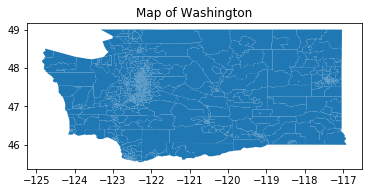

In [177]:
plot_map(wa)

In [178]:
def plot_population_map(df):
    df.dropna().plot(column='POP2010', figsize=(15, 7), legend = True)
    plt.title('Population in Census Track')
    plt.savefig('washington_population_map.png')

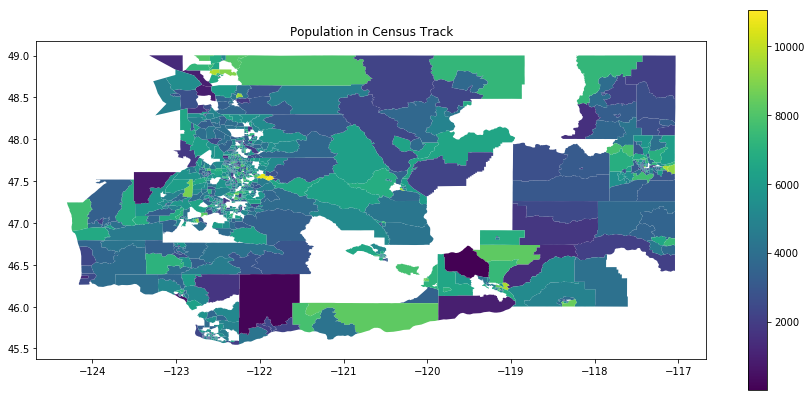

In [179]:
plot_population_map(wa)

In [180]:
def plot_population_county_map(df):
    population_by_county = df.dropna().dissolve(by = 'County', aggfunc='sum')
    population_by_county.plot(column='POP2010', figsize=(15, 7), legend = True)
    plt.title('Population in Each County')
    plt.savefig('plot_population_county_map.png')

Text(0.5, 1.0, 'plot_population_county_map')

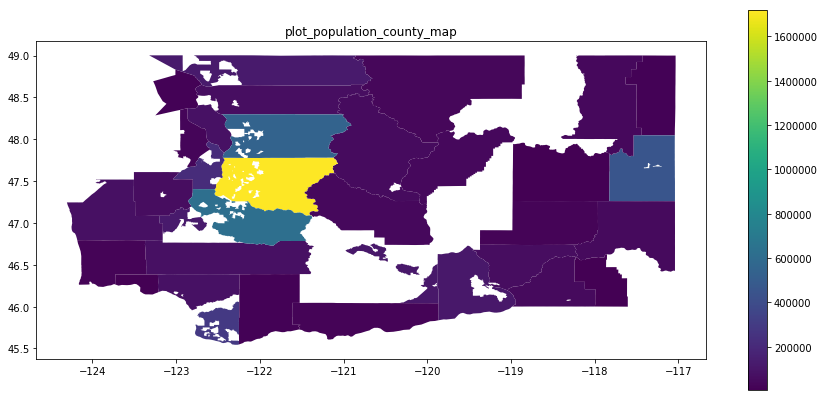

In [68]:
population_by_county = wa.dropna().dissolve(by = 'County', aggfunc='sum')
population_by_county.plot(column='POP2010',figsize=(15, 7),legend = True)
plt.title('plot_population_county_map')

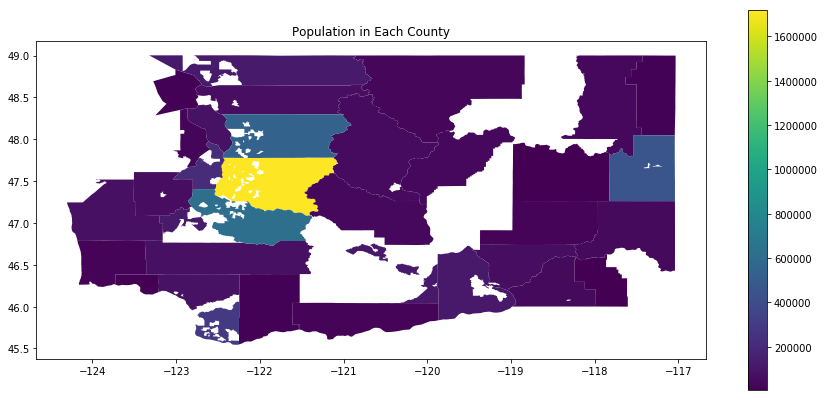

In [181]:
plot_population_county_map(wa)

In [86]:
def plot_food_access_by_county(dt):
    wa_population = dt[['County', 'geometry', 'POP2010', 'lapophalf', 'lalowihalf', 'lapop10', 'lalowi10']]
    population_by_county = wa_population.dropna().dissolve(by = 'County', aggfunc='sum')
    fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, figsize=(20, 10), ncols=2)
    index = [ax1, ax2, ax3, ax4]
    n = 0
    for col_name in list(population_by_county.columns.values)[2:7]:
        index[n].set_title(col_name)
        population_by_county[col_name+'_share'] = population_by_county[col_name]/population_by_county.POP2010
        population_by_county.plot(ax = index[n], column= col_name+'_share', legend = True, vmin = 0, vmax =1)  
        n += 1
    fig.show()

In [184]:
def plot_food_access_by_county(df):
    wa_population = df[['County', 'geometry', 'POP2010', 'lapophalf', 'lapop10', 'lalowihalf', 'lalowi10']]
    population_by_county = wa_population.dropna().dissolve(by = 'County', aggfunc='sum')
    fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, figsize=(20, 10), ncols=2)
    for col_name in list(population_by_county.columns.values)[2:7]:
        population_by_county[col_name+'_share'] = population_by_county[col_name]/population_by_county.POP2010
    
    ax1.set_title('Low Access: Half')    
    population_by_county.plot(ax = ax1, column= 'lapophalf_share', legend = True, vmin = 0, vmax =1)     
    ax2.set_title('Low Access + Low Income: Half')
    population_by_county.plot(ax = ax2, column= 'lalowihalf_share', legend = True, vmin = 0, vmax =1)  
    ax3.set_title('Low Access: 10')
    population_by_county.plot(ax = ax3, column= 'lapop10_share', legend = True, vmin = 0, vmax =1)  
    ax4.set_title('Low Access + Low Income: 10')
    population_by_county.plot(ax = ax4, column= 'lalowi10_share', legend = True, vmin = 0, vmax =1)  
    
    fig.savefig('washington_county_food_access.png')

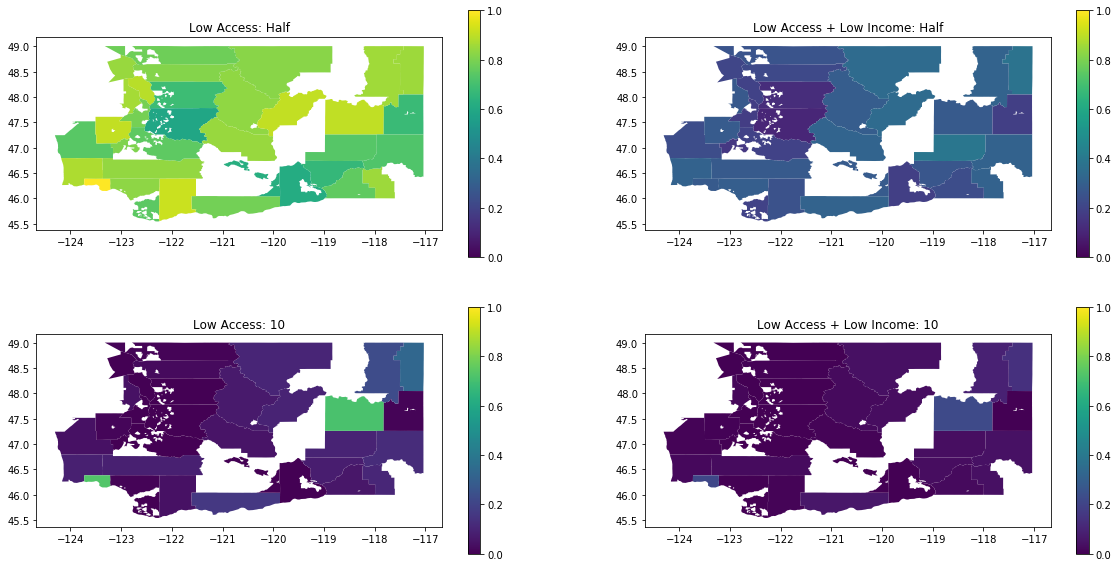

In [185]:
plot_food_access_by_county(wa)

In [ ]:
wa_population = wa[['County', 'geometry', 'POP2010', 'lapophalf', 'lapop10', 'lalowihalf', 'lalowi10']]
population_by_county = wa_population.dropna().dissolve(by = 'County', aggfunc='sum')

list(population_by_county.columns.values)[2:7]
population_by_county
    fig.savefig('washington_county_food_access.png')

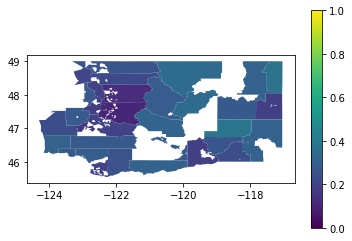

In [148]:
for col_name in list(population_by_county.columns.values)[2:7]:
    population_by_county[col_name+'_share'] = population_by_county[col_name]/population_by_county.POP2010
population_by_county
col = 'lalowihalf'
population_by_county.plot(column=col+'_share', legend = True, vmin = 0, vmax =1)

In [166]:
n = 2
ax2 = 'ax'+str(n)
ax2

'ax2'

In [209]:
import numpy as np
np.arange(3).reshape((3,1))+np.arange(3)

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

In [215]:
np.arange(3).reshape((3,1))

array([[0],
       [1],
       [2]])

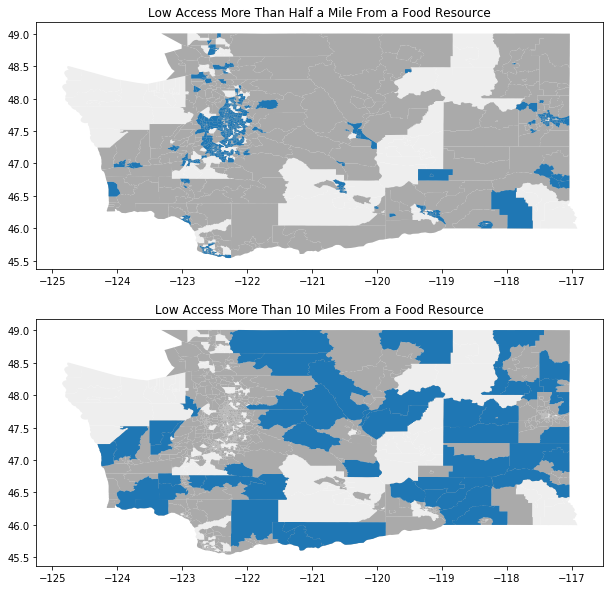

In [156]:
low_access_pop = wa[['Urban','LATracts_half','Rural','LATracts10','geometry', 'POP2010', 'lapophalf', 'lapop10']].dropna()
urban_low_access = low_access_pop[(low_access_pop['Urban']==1) & ((low_access_pop['lapophalf']>=500) | ((low_access_pop['lapophalf']/low_access_pop['POP2010']) > 0.33))]
rural_low_access = low_access_pop[(low_access_pop['Rural']==1) & ((low_access_pop['lapop10']>=500) | ((low_access_pop['lapop10']/low_access_pop['POP2010']) > 0.33))]

fig, [ax1, ax2] = plt.subplots(2,figsize=(20, 10))
ax1.set_title('Low Access More Than Half a Mile From a Food Resource')
wa.plot(ax = ax1, color='#EEEEEE',vmin = 0, vmax =1,legend = True)
low_access_pop.plot(ax = ax1, color='#AAAAAA',vmin = 0, vmax =1,legend = True)
urban_low_access.plot(ax = ax1, legend = True, vmin = 0, vmax =1)  

ax2.set_title('Low Access More Than 10 Miles From a Food Resource')
wa.plot(ax = ax2, color='#EEEEEE',vmin = 0, vmax =1,legend = True)
low_access_pop.plot(ax = ax2, color='#AAAAAA',vmin = 0, vmax =1,legend = True)
rural_low_access.plot(ax = ax2, legend = True, vmin = 0, vmax =1) 

In [195]:
def plot_low_access_tracts(df):
    low_access_pop = df[['Urban','Rural','geometry', 'POP2010', 'lapophalf', 'lapop10']].dropna()
    urban_low_access = (low_access_pop['Urban']==1) & ((low_access_pop['lapophalf']>=500) | ((low_access_pop['lapophalf']/low_access_pop['POP2010']) > 0.33))
    rural_low_access = (low_access_pop['Rural']==1) & ((low_access_pop['lapop10']>=500) | ((low_access_pop['lapop10']/low_access_pop['POP2010']) > 0.33))
    low_access = low_access_pop[urban_low_access | rural_low_access]
    fig, ax = plt.subplots(1,figsize=(10, 10))
    ax.set_title('Low Access from a Food Resource')
    df.plot(ax = ax, color='#EEEEEE',vmin = 0, vmax =1)
    low_access_pop.plot(ax = ax, color='#AAAAAA',vmin = 0, vmax =1)
    low_access.plot(ax = ax, vmin = 0, vmax =1)  

    #ax2.set_title('Low Access More Than 10 Miles From a Food Resource')
    #df.plot(ax = ax2, color='#EEEEEE',vmin = 0, vmax =1)
    #low_access_pop.plot(ax = ax2, color='#AAAAAA',vmin = 0, vmax =1)
    #rural_low_access.plot(ax = ax2, vmin = 0, vmax =1) 
    

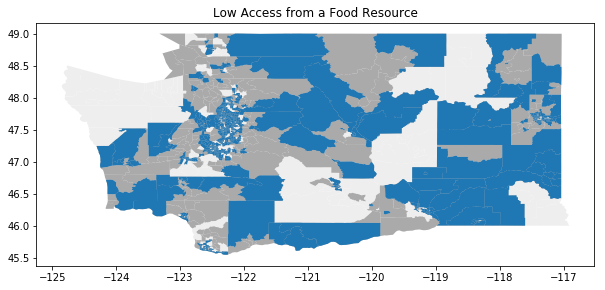

In [196]:
plot_low_access_tracts(wa)

In [166]:
low_access

NameError: name 'low_access' is not defined